In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Import libraries
!pip install --upgrade pip
!pip install pandas seaborn matplotlib plotly
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px

In [24]:
# file = "/content/drive/MyDrive/Colab Notebooks/Web scraping/project 3/car-price2.csv"
file = "/home/viviane/Webscraping-car-price-prediction/data/car-price2.csv"
df = pd.read_csv(file , encoding="utf-8")
df=df.dropna()
df.head()

,Name,Brand,Color,Fuel,Gearbox,Year,Km,Fuel_consumption,Co2_emission,Doors,Price
0,Fiat 500,Fiat,Tech House Grey,Essence,Manuelle,2018,28150,4.9,115.0,3.0,10 999
1,Citroën C4 Picasso,Citroën,Gris Aluminium,Essence,Manuelle,2015,102511,5.1,116.0,5.0,10 299
2,Citroën C4 Cactus,Citroën,GRIGIO,Diesel,Manuelle,2019,122316,3.5,92.0,5.0,12 399
3,Ford KA,Ford,Bleu Caraïbes,Essence,Manuelle,2015,103265,4.9,115.0,3.0,7 599
4,Fiat Tipo,Fiat,Bleu Méditerranée,Essence,Manuelle,2017,85152,5.7,132.0,4.0,9 699


In [30]:
pairs_df = df[['Brand', 'Name', 'Color']].drop_duplicates()\
    .sort_values(by=['Brand', 'Name', 'Color'], ascending=True)\
    .reset_index(drop=True)
# pairs_df.to_csv('../data/brand_name_color_pairs.csv', index=False)

fuel = df['Fuel'].drop_duplicates()
print(fuel)
#

0                           Essence
2                            Diesel
24                       Electrique
80                  Hybride essence
83     Hybride essence rechargeable
478                  Hybride diesel
837                             GPL
Name: Fuel, dtype: object


In [18]:
print(df.dtypes)
df.shape

Name                 object
Brand                object
Color                object
Fuel                 object
Gearbox              object
Year                  int64
Km                    int64
Fuel_consumption    float64
Co2_emission        float64
Doors               float64
Price                 int64
dtype: object


(2039, 11)

In [17]:
df['Price']=df['Price'].str.replace(r'\s+', '', regex=True).astype(int)
df['Co2_emission'] = pd.to_numeric(df['Co2_emission'], errors='coerce')
df['Fuel_consumption'] = pd.to_numeric(df['Fuel_consumption'], errors='coerce')
df['Gearbox'] = df['Gearbox'].str.replace(r'Auto.*', 'Automatique')

df=df.dropna()
df.head()

,Name,Brand,Color,Fuel,Gearbox,Year,Km,Fuel_consumption,Co2_emission,Doors,Price
0,Fiat 500,Fiat,Tech House Grey,Essence,Manuelle,2018,28150,4.9,115.0,3.0,10999
1,Citroën C4 Picasso,Citroën,Gris Aluminium,Essence,Manuelle,2015,102511,5.1,116.0,5.0,10299
2,Citroën C4 Cactus,Citroën,GRIGIO,Diesel,Manuelle,2019,122316,3.5,92.0,5.0,12399
3,Ford KA,Ford,Bleu Caraïbes,Essence,Manuelle,2015,103265,4.9,115.0,3.0,7599
4,Fiat Tipo,Fiat,Bleu Méditerranée,Essence,Manuelle,2017,85152,5.7,132.0,4.0,9699


In [6]:
fig = px.box(df, x='Gearbox', y='Price',color_discrete_sequence=px.colors.sequential.Agsunset,
             width=600, height=500)
fig.update_layout(title_text='Box Plot of Price by Gearbox Type')

# Show the plot
fig.show()

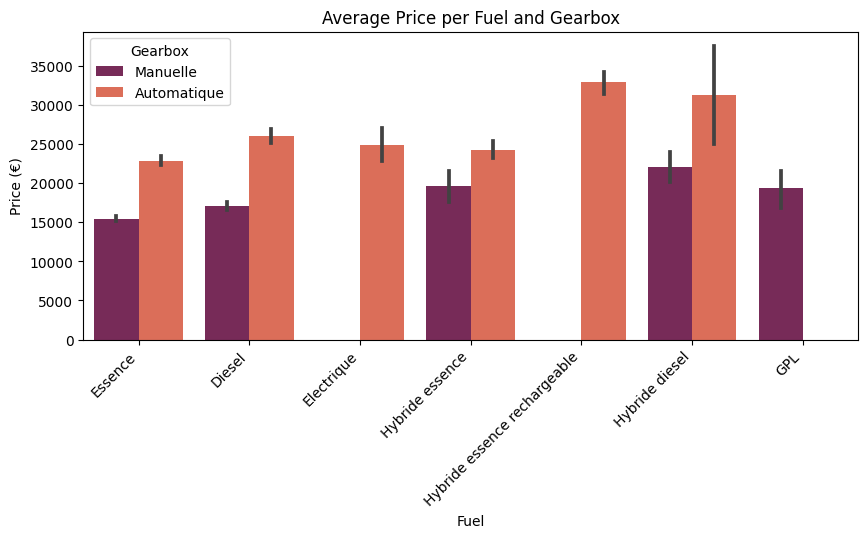

In [7]:
# Bar plot of the average price per Fuel and Gearbox
plt.figure(figsize=(10, 4))
sns.barplot(x='Fuel', y='Price', hue='Gearbox', data=df, palette="rocket")
plt.title('Average Price per Fuel and Gearbox')
plt.xlabel('Fuel')
plt.ylabel('Price (€)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gearbox')
plt.show()

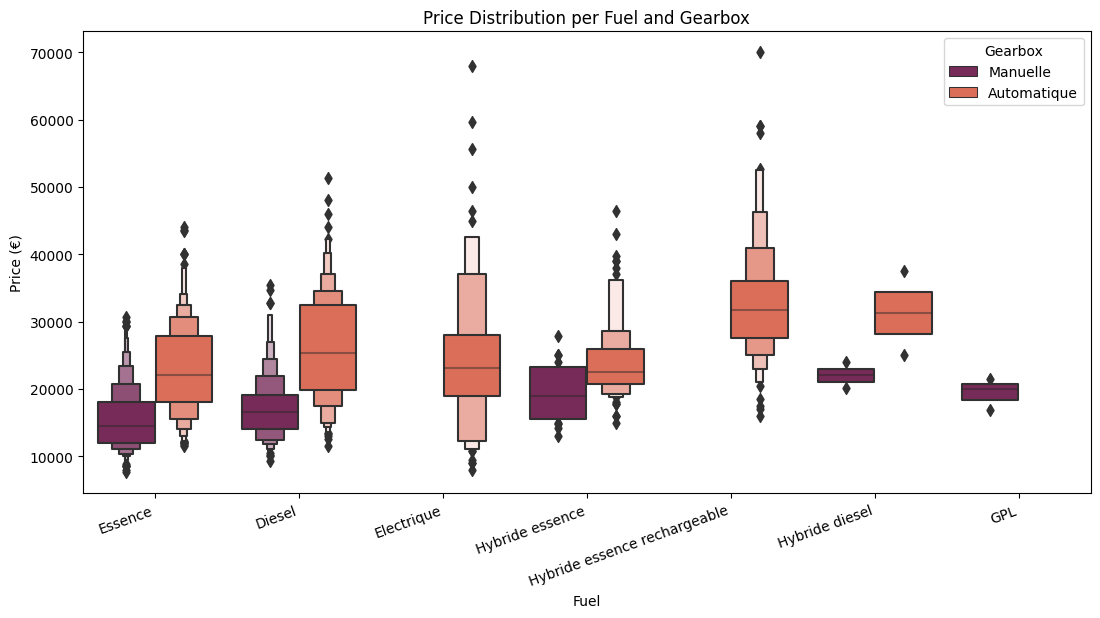

In [8]:
# sns.set(style="whitegrid")
plt.figure(figsize=(13, 6))
sns.boxenplot(x='Fuel', y='Price', hue='Gearbox', data=df, palette="rocket")
plt.title('Price Distribution per Fuel and Gearbox')
plt.xlabel('Fuel')
plt.ylabel('Price (€)')
plt.xticks(rotation=20, ha='right')
plt.legend(title='Gearbox')
plt.show()

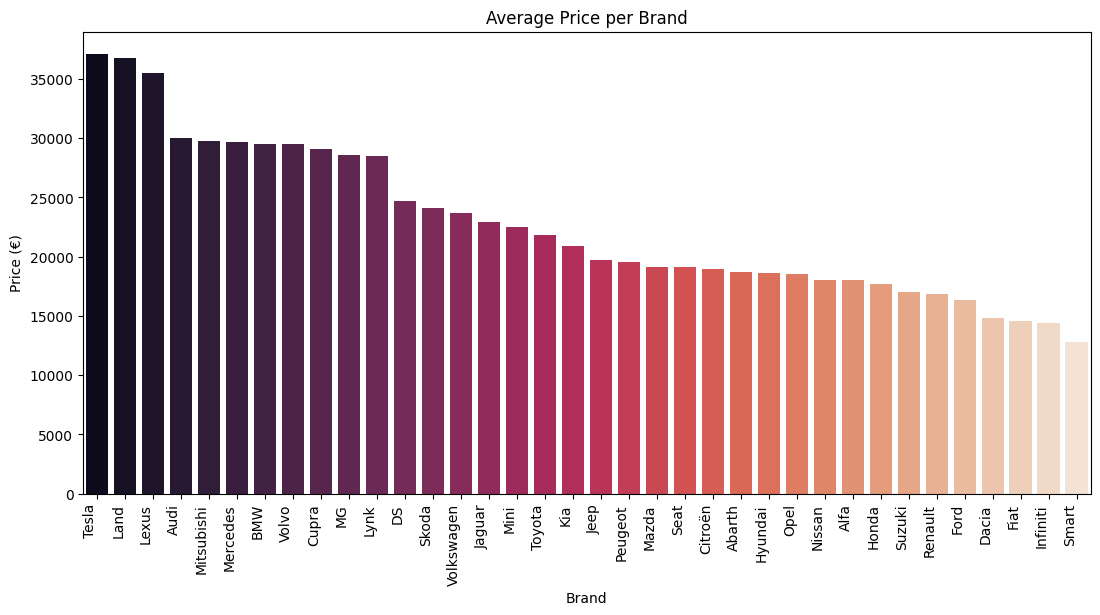

In [9]:
# Bar plot of the average price per Brand
order = df.groupby('Brand')['Price'].mean().reset_index().sort_values(by='Price', ascending=False)
plt.figure(figsize=(13, 6))
sns.barplot(x='Brand', y='Price', data=order, palette="rocket")
plt.title('Average Price per Brand')
plt.xlabel('Brand')
plt.ylabel('Price (€)')
plt.xticks(rotation=90, ha='right')
# plt.legend(title='Gearbox')
plt.show()

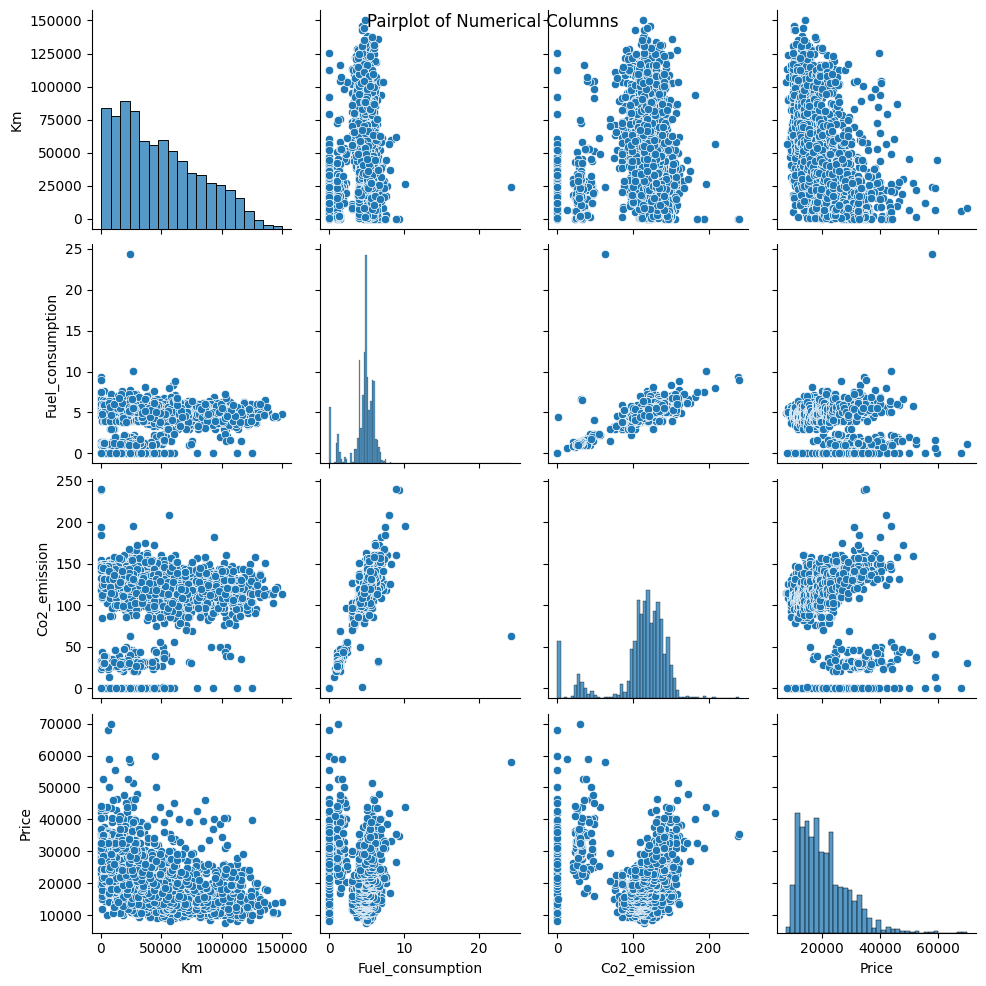

In [10]:
# Pairplot to visualize relationships between numerical columns
sns.pairplot(df[['Km', 'Fuel_consumption', 'Co2_emission', 'Price']])
plt.suptitle('Pairplot of Numerical Columns')
plt.show()

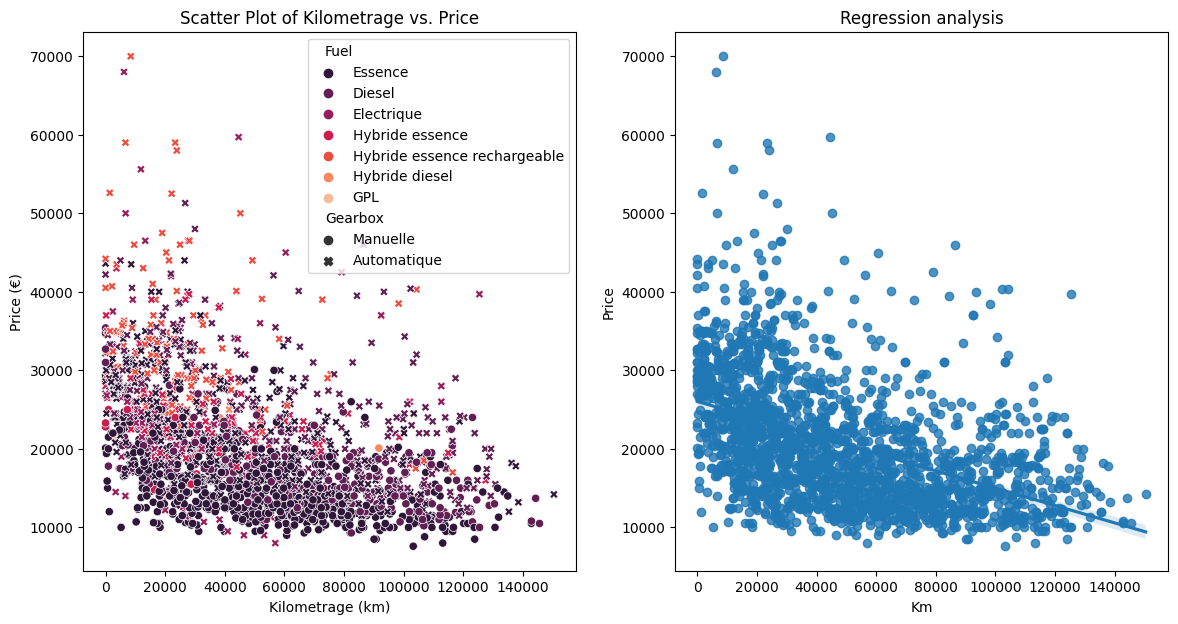

In [11]:
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
sns.scatterplot(x='Km', y='Price', style='Gearbox', hue='Fuel', data=df, palette="rocket")
plt.title('Scatter Plot of Kilometrage vs. Price')
plt.xlabel('Kilometrage (km)')
plt.ylabel('Price (€)')

plt.subplot(1,2,2)
sns.regplot(x='Km',y='Price', data=df)
plt.title('Regression analysis')
plt.show()

In [12]:
px.scatter(df, x='Km', y='Price', color='Gearbox', trendline='ols',
           size='Fuel_consumption',
           title='Scatter plot with Regression Lines of mileage and price',
           width=600, height=600, size_max=10, opacity=0.5,
          color_discrete_sequence=px.colors.sequential.Electric)

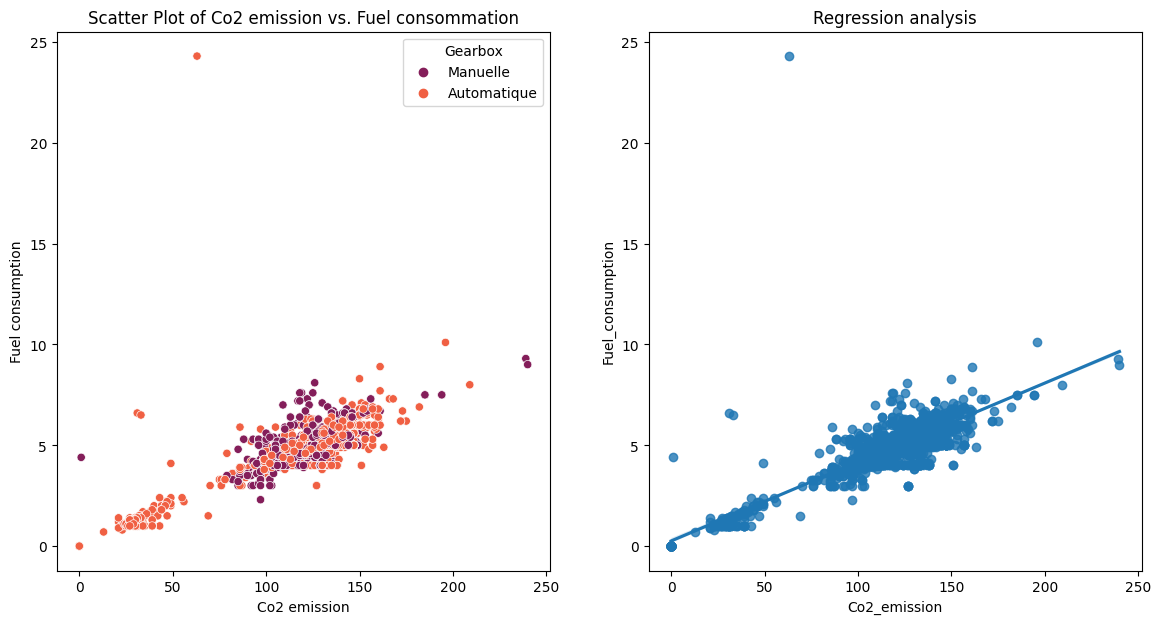

In [13]:
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
sns.scatterplot(x='Co2_emission', y='Fuel_consumption', hue='Gearbox', data=df, palette="rocket")
plt.title('Scatter Plot of Co2 emission vs. Fuel consommation')
plt.xlabel('Co2 emission')
plt.ylabel('Fuel consumption')
plt.legend(title='Gearbox')

plt.subplot(1,2,2)
sns.regplot(x='Co2_emission',y='Fuel_consumption', data=df)
plt.title('Regression analysis')
plt.show()

<Axes: xlabel='Gearbox', ylabel='Year'>

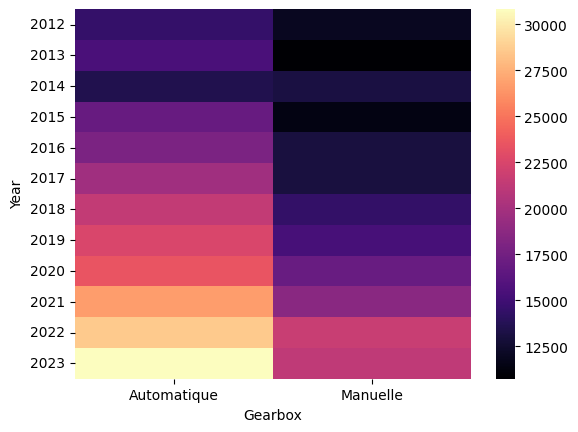

In [14]:
# Heat map of Price by year and gearbox
f = df.pivot_table(index='Year', columns='Gearbox', values='Price')
cmap = sns.color_palette("magma", as_cmap=True)
sns.heatmap(f, cmap=cmap)

<Axes: xlabel='Gearbox', ylabel='Fuel_consumption'>

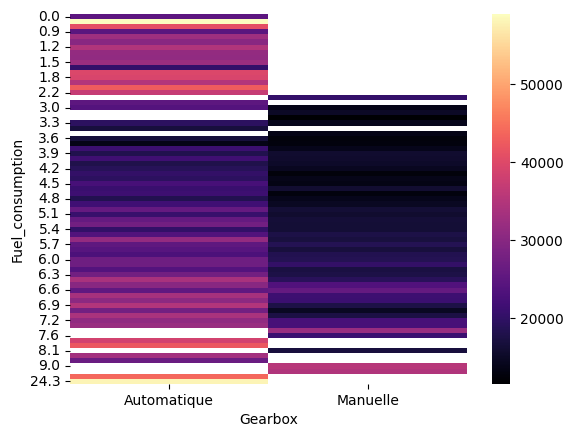

In [15]:
# Heat map of Price by fuel consumption and gearbox
f = df.pivot_table(index='Fuel_consumption', columns='Gearbox', values='Price')
cmap = sns.color_palette("magma", as_cmap=True)
sns.heatmap(f, cmap=cmap)

In [16]:
# 3D scatter plot of Km, price, fuel consumption
from plotly.offline import plot
# !pip install -U kaleido

fig = px.scatter_3d(df, x='Km', y='Price', z='Year',color='Fuel', size='Fuel_consumption',
                    width=800, height=600,
                    size_max=30, opacity=0.7,
                    color_discrete_sequence=px.colors.sequential.Magenta)
fig.show()
fig.write_html("3dchart.html")

In [17]:
# Find distinct values in each feature or column
for x in df.columns:
    #prinfting unique values
    print(x ,':', len(df[x].unique()))

Name : 290
Brand : 36
Color : 559
Fuel : 7
Gearbox : 2
Year : 12
Km : 1934
Fuel_consumption : 73
Co2_emission : 128
Doors : 5
Price : 318


*Run this code to remove noisy data to improve model's performance*

In [18]:
to_drop = df.loc[(df['Gearbox'] == 'Automatique') & (df['Price'] >= 46499)]
df.drop(to_drop.index, inplace=True)
to_drop = df.loc[(df['Gearbox'] == 'Manuelle') & (df['Price'] >= 27499)]
df.drop(to_drop.index, inplace=True)
df.shape

(2000, 11)

# **Machine Learning models: predict car price**

In [ ]:
# Import ML libraries and requirements
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# from sklearn.utils import resample
import numpy as np

In [34]:
# Define columns based on their types
text_features = ['Name', 'Color']
categorical_features = ['Brand', 'Fuel', 'Gearbox']
numeric_features = ['Year', 'Km', 'Fuel_consumption', 'Co2_emission', 'Doors']

# Extract features and target
X = df[['Name', 'Color', 'Brand', 'Fuel', 'Gearbox','Year', 'Km', 'Fuel_consumption', 'Co2_emission', 'Doors']]
Y = df['Price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **Build model**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import timeit

# Create a column transformer for data preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

le = LabelEncoder()
for column in text_features:
  x_train[column] = le.fit_transform(x_train[column])
  x_test[column] = le.fit_transform(x_test[column])

results = []
# Function to train and evaluate a model
def train_and_evaluate_model(model, model_name, training_time):
    # Train the model
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)

    # Number of observations is the shape along axis 0
    n = x_train.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = x_train.shape[1]

    # Calculate evaluation metrics
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    r2 = round(r2_score(y_test, y_pred), 4)
    adjusted_r2 = round(1-(1-(r2*100))*(n-1)/(n-p-1),2)

    # Print evaluation metrics
    print(f"\n{model_name} Evaluation Metrics:")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")
    print(f"Adjusted R-squared %: {adjusted_r2}")
    print(f"Traning time: {training_time}")
    results.append({
      "Model": model_name,
      "Root Mean Squared Error": rmse,
      "Mean Absolute Error": mae,
      "R2": r2,
      "Adjusted R2": adjusted_r2,
      "Training time": training_time
  })

In [22]:
x_train.dtypes

Name                  int64
Color                 int64
Brand                object
Fuel                 object
Gearbox              object
Year                  int64
Km                    int64
Fuel_consumption    float64
Co2_emission        float64
Doors               float64
dtype: object

In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.4, n_estimators=150,
                          max_depth=3, subsample=1, colsample_bytree=1)
# Regression pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xg_reg)
])
# Train and evaluate each model
training_time = round(timeit.timeit("model_pipeline.fit(x_train, y_train)", globals=globals(), number=10),2)
train_and_evaluate_model(model_pipeline, 'XGB Regression', training_time)

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True, copy_X=True)
# Regression pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', model)
])
# Train and evaluate each model
training_time = round(timeit.timeit("model_pipeline.fit(x_train, y_train)", globals=globals(), number=10),2)
train_and_evaluate_model(model_pipeline, 'Linear Regression', training_time)


Linear Regression Evaluation Metrics:
Root Mean Squared Error: 3153.39
Mean Absolute Error: 2366.13
R-squared: 0.8143
Adjusted R-squared %: 81.94
Traning time: 0.26


In [25]:
from sklearn.linear_model import Lasso

# Create model object for Regression problem
model = Lasso(alpha=0.5, fit_intercept=True, max_iter=700)

# Regression pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', model)
])
# Train and evaluate each model
training_time = round(timeit.timeit("model_pipeline.fit(x_train, y_train)", globals=globals(), number=10),2)
train_and_evaluate_model(model_pipeline, 'Lasso Regression', training_time)


Lasso Regression Evaluation Metrics:
Root Mean Squared Error: 3147.77
Mean Absolute Error: 2361.41
R-squared: 0.815
Adjusted R-squared %: 82.01
Traning time: 1.2


In [26]:
from sklearn.linear_model import Ridge

# Create model object for Regression problem
model = Ridge(random_state=42, alpha=0.5, fit_intercept=True, solver='auto', max_iter=20, tol=0.015)

# # Regression pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', model)
])
# Train and evaluate each model
training_time = round(timeit.timeit("model_pipeline.fit(x_train, y_train)", globals=globals(), number=10),2)
train_and_evaluate_model(model_pipeline, 'Ridge Regression', training_time)


Ridge Regression Evaluation Metrics:
Root Mean Squared Error: 3179.73
Mean Absolute Error: 2389.85
R-squared: 0.8112
Adjusted R-squared %: 81.62
Traning time: 0.15


In [27]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, n_estimators=40,
                              max_depth=20, min_samples_leaf=1, min_samples_split=2)

# Regression pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', model)
])
# Train and evaluate each model
training_time = round(timeit.timeit("model_pipeline.fit(x_train, y_train)", globals=globals(), number=10),2)
train_and_evaluate_model(model_pipeline, 'Random Forest Regression', training_time)


Random Forest Regression Evaluation Metrics:
Root Mean Squared Error: 2798.75
Mean Absolute Error: 1873.75
R-squared: 0.8538
Adjusted R-squared %: 85.91
Traning time: 10.34


In [28]:
from sklearn.svm import SVR

svr_model = SVR(C=4500, kernel='linear', gamma='auto', epsilon=0.5)
# Regression pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', svr_model)
])
# Train and evaluate each model
training_time = round(timeit.timeit("model_pipeline.fit(x_train, y_train)", globals=globals(), number=10),2)
train_and_evaluate_model(model_pipeline, 'SVR Regression', training_time)


SVR Regression Evaluation Metrics:
Root Mean Squared Error: 3108.93
Mean Absolute Error: 2331.33
R-squared: 0.8195
Adjusted R-squared %: 82.46
Traning time: 2.45


In [29]:
# ensemble learning
from sklearn.ensemble import VotingRegressor

random_model = RandomForestRegressor(random_state=42, n_estimators=40,
                              max_depth=20, min_samples_leaf=1, min_samples_split=2)
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.4, n_estimators=150,
                          max_depth=3, subsample=1, colsample_bytree=1)
# model = Lasso(alpha=0.5, fit_intercept=True, max_iter=700)
# svr_model = SVR(C=5500, kernel='linear', gamma='auto', epsilon=0.5)

ensemble_model = VotingRegressor([('random_forest', random_model),
                                  ('xgb', xg_reg),
                                  # ('svr', svr_model),
                                  # ('lasso',model)
                                  ])
pipeline3 = Pipeline([('preprocessor', preprocessor),
    ('regressor', ensemble_model)])
training_time = round(timeit.timeit("pipeline3.fit(x_train, y_train)", globals=globals(), number=10),2)
train_and_evaluate_model(pipeline3, 'Emsemble Regression', training_time)


Emsemble Regression Evaluation Metrics:
Root Mean Squared Error: 2562.3
Mean Absolute Error: 1769.78
R-squared: 0.8774
Adjusted R-squared %: 88.29
Traning time: 11.69


In [30]:
results = pd.DataFrame(results)
results.reset_index()
results

,Model,Root Mean Squared Error,Mean Absolute Error,R2,Adjusted R2,Training time
0,XGB Regression,2639.97,1861.12,0.8699,87.53,0.93
1,Linear Regression,3153.39,2366.13,0.8143,81.94,0.26
2,Lasso Regression,3147.77,2361.41,0.8150,82.01,1.20
3,Ridge Regression,3179.73,2389.85,0.8112,81.62,0.15
4,Random Forest Regression,2798.75,1873.75,0.8538,85.91,10.34
5,SVR Regression,3108.93,2331.33,0.8195,82.46,2.45
6,Emsemble Regression,2562.30,1769.78,0.8774,88.29,11.69


In [ ]:
# hyper-parameters tuning
from sklearn.model_selection import GridSearchCV

x_train[numeric_features] = MinMaxScaler().fit_transform(x_train[numeric_features])
x_test[numeric_features] = MinMaxScaler().fit_transform(x_test[numeric_features])

x_train = pd.get_dummies(x_train, drop_first=True, columns= categorical_features)
transformed_cols = x_train.columns.tolist()
x_test = pd.get_dummies(x_test, drop_first=True, columns= categorical_features)
x_test = x_test.reindex(columns=transformed_cols).fillna(0)

# param grid for Random Forest
param_grid = {
    'n_estimators': np.arange(10,100,10),  # Example values, adjust as needed
    'max_depth': np.arange(10,30,5),  # Example values, adjust as needed
    'min_samples_split': [2, 5, 10],  # Example values, adjust as needed
    'min_samples_leaf': np.arange(1,5,1)  # Example values, adjust as needed
}

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# # param grid for SVR
# param_grid = {
#     'C': np.arange(1000, 7000, 100),             # Regularization parameter
#     'kernel': ['linear', 'rbf'],   # Kernel type ('linear', 'rbf', etc.)
#     'gamma': ['scale', 'auto'],    # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
#     'epsilon': np.arange(0.1, 0.5, 0.1)     # Epsilon in the SVR model
# }
# svr_model = SVR()

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(x_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)